# Email Spam Detection Model

## Import Necessary Libraries

Start by importing the required libraries for data processing, model building, evaluation, and visualization.

In [20]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

## Load and Inspect the Dataset

We need to load the dataset and inspect it for initial analysis. Let’s assume the dataset file is spam_or_not_spam.csv.

In [21]:
# Load the dataset
df = pd.read_csv('spam_or_not_spam.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Check the distribution of spam vs ham
print(df['label'].value_counts())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
label
0    2500
1     500
Name: count, dtype: int64


#### Explanation

label column should indicate spam (1) or ham (0) messages.

Inspect the first few rows to understand the dataset structure.

## Data Cleaning and Preprocessing

Clean and preprocess the text data by removing unnecessary characters, stopwords, and performing lemmatization.

In [22]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatize and remove stopwords
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['email'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iabhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iabhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Explanation

The function clean_text handles lowercasing, punctuation removal, and stopword filtering.

Lemmatization converts words to their root form (e.g., "running" to "run").

## Split the Dataset into Features and Target Variable

Prepare the features (X) and target (y) for model training. Use CountVectorizer for converting text into numerical form.

In [23]:
# Split the data into features (X) and target labels (y)
X = df['cleaned_text']
y = df['label']

# Convert the text data to numeric vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Explanation

CountVectorizer transforms the text data into a matrix of token counts, which can be used by machine learning algorithms.

Split the data into training and test sets (80-20 ratio).

## Model Training and Evaluation

Train the Naive Bayes classifier on the training data and evaluate the performance.

In [24]:
# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       1.00      0.94      0.97        95

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



#### Explanation

Naive Bayes is a common and effective algorithm for text classification tasks.

Evaluate using accuracy and classification report to assess precision, recall, and F1-score.

## Optional - Hyperparameter Tuning Using GridSearchCV

Optimize the hyperparameters of the Naive Bayes model for better accuracy.

In [25]:
# Set up the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.5, 1.0, 1.5],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class priors
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_nb_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best parameters found: {'alpha': 0.5, 'fit_prior': True}
Best Model Accuracy: 0.99
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       1.00      0.94      0.97        95

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



#### Explanation

GridSearchCV performs exhaustive search over specified parameter values (like alpha and fit_prior) to select the best-performing model.

## Optional - Handling Class Imbalance (SMOTE or Class Weights)

Handle the class imbalance in the dataset using SMOTE or class weights.

### Using Class Weights:

In [26]:
# Set class weights for Naive Bayes
model_with_class_weights = MultinomialNB(class_prior=None)

# Train the model
model_with_class_weights.fit(X_train, y_train)

# Evaluate the model
y_pred_weighted = model_with_class_weights.predict(X_test)
print("Model with Class Weights Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Model with Class Weights Classification Report:\n", classification_report(y_test, y_pred_weighted))

Model with Class Weights Accuracy: 0.99
Model with Class Weights Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       1.00      0.94      0.97        95

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



### Using SMOTE:

In [27]:
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on resampled data
model_resampled = MultinomialNB()
model_resampled.fit(X_resampled, y_resampled)

# Evaluate the resampled model
y_pred_resampled = model_resampled.predict(X_test)
print("Resampled Model Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Resampled Model Classification Report:\n", classification_report(y_test, y_pred_resampled))

Resampled Model Accuracy: 0.985
Resampled Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       0.98      0.93      0.95        95

    accuracy                           0.98       600
   macro avg       0.98      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



#### Explanation

SMOTE generates synthetic samples for the minority class, addressing class imbalance.

Class Weights modify the model to pay more attention to the minority class during training.

## Optional - Experiment with Other Models (Logistic Regression and Random Forest)

We can try other models like Logistic Regression or Random Forest to see if they perform better.

### Logistic Regression:

In [28]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9866666666666667
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       0.99      0.93      0.96        95

    accuracy                           0.99       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.99      0.99       600



### Random Forest:

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9733333333333334
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       505
           1       0.93      0.89      0.91        95

    accuracy                           0.97       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.97      0.97      0.97       600



## Optional - Cross-Validation

Use cross-validation to evaluate model performance across different splits of the data.

In [30]:
# Perform 5-fold cross-validation on the Naive Bayes model
cross_val_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.97666667 0.97       0.97833333 0.97166667 0.99333333]
Average Cross-Validation Score: 0.9780000000000001


#### Explanation

Cross-validation helps in better generalization by splitting data into multiple subsets and validating on each subset.

## Optional - Visualizing the Confusion Matrix

Visualize the model’s predictions using a confusion matrix.

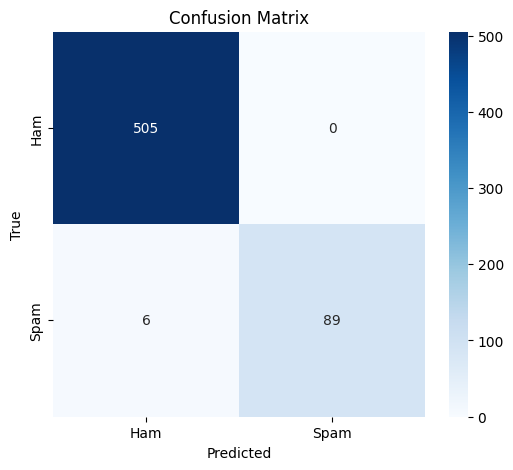

In [31]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Save the Model for Future Use

We can save the trained model using joblib for future predictions.

In [32]:
# Save the trained model using joblib
joblib.dump(nb_model, 'spam_detection_model.pkl')

joblib.dump(nb_model, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

## Optional - Web Application with Streamlit

Create a simple web interface using Streamlit to allow users to classify spam/ham messages.

In [33]:
import streamlit as st

# Load the saved model
model = joblib.load('spam_detection_model.pkl')
vectorizer = joblib.load('count_vectorizer.pkl')

# Define the Streamlit interface
st.title('Spam Detection Web App')

user_input = st.text_area("Enter a message")

if st.button("Classify"):
    cleaned_input = clean_text(user_input)
    input_vectorized = vectorizer.transform([cleaned_input])
    prediction = model.predict(input_vectorized)
    
    if prediction == 1:
        st.write("This is a Spam message.")
    else:
        st.write("This is a Ham message.")

2024-11-24 01:34:51.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 01:34:51.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Conclusion and Final Thoughts

We have successfully built and evaluated a spam detection model.

Consider advanced techniques such as deep learning (e.g., LSTM) if working with larger datasets or more complex scenarios.

Explore model deployment using services like Flask or Streamlit for real-time predictions.